# Building and Visualising Parse Trees in Python

## Introduction
In this tutorial, we'll explore how to construct and visualise parse trees using Python. Parse trees are essential in understanding the syntactic structure of sentences, whether in programming languages or natural languages. We'll use two Python libraries, NetworkX for graph manipulation and Matplotlib for visualisation.

## Step 1 - Our Grammar

For this tutorial, we'll use a simple arithmetic grammar that encompasses addition and multiplication. In Backus-Naur Form, a simplified version of our grammar could be:

In [6]:
grammar = {
    "<expressio>n": [
        ("<term>",),
        ("<expression>", "+", "<term>"),
        ("<expression>", "-", "<term>")
    ],
    "<term>": [
        ("<factor>",),
        ("<term>", "*", "<factor>"),
        ("<term>", "/", "<factor>")
    ],
    "<factor>": [
        ("<number>",),
        ("(", "<expression>", ")")
    ],
    "<number>": "^[0-9]+$"  # A regular expression to match one or more digits
}

## Step 2: Manually Parsing an Expression

Before automating the process, let's manually parse a simple expression, such as "3 + 2 * 1". This exercise will help us understand the steps required to decompose an expression into its components, following our defined grammar.

1. **Identify the main components**: The expression can be broken down into an expression comprising a term, an operator, and another term.
2. **Further decomposition**: Each term can be a factor or another operation.

Manual parsing helps us understand the recursive nature of grammars.

## Step 3: Constructing the Parse Tree

With our parsed expression, we can now represent it as a parse tree. For simplicity, let's define this structure as an adjacency list in Python:

In [4]:
parse_tree = {
    'expression': ['4', 'op*', 'term'],
    'term': ['3', 'op+', '2']
}

## Step 4: Building and Visualising the Parse Tree

To visualise this tree, we'll create a directed graph with **NetworkX** and then draw it with **Matplotlib**.

In [8]:
import re

class Parser:
    def __init__(self, input):
        self.tokens = re.findall(r'\d+|[+*/()-]', input)
        self.current_token = None
        self.next_token()

    def next_token(self):
        if self.tokens:
            self.current_token = self.tokens.pop(0)
        else:
            self.current_token = None

    def match(self, token):
        if self.current_token == token:
            self.next_token()
        else:
            raise ParserError(f"Expected {token}, got {self.current_token}")

    def parse_number(self):
        if self.current_token.isdigit():
            token = self.current_token
            self.next_token()
            return ('number', token)
        raise ParserError(f"Expected number, got {self.current_token}")

    def parse_factor(self):
        if self.current_token == '(':
            self.match('(')
            node = self.parse_expression()
            self.match(')')
            return node
        else:
            return self.parse_number()

    def parse_term(self):
        node = self.parse_factor()
        while self.current_token in ['*', '/']:
            operator = self.current_token
            self.next_token()
            node = ('term', node, operator, self.parse_factor())
        return node

    def parse_expression(self):
        node = self.parse_term()
        while self.current_token in ['+', '-']:
            operator = self.current_token
            self.next_token()
            node = ('expression', node, operator, self.parse_term())
        return node

    def parse(self):
        return self.parse_expression()

# Example usage
input_expression = "3 + 2 * (1 + 4)"
parser = Parser(input_expression)
try:
    parse_tree = parser.parse()
    print(parse_tree)
except ParserError as e:
    print(f"Parse error: {e}")

('expression', ('number', '3'), '+', ('term', ('number', '2'), '*', ('expression', ('number', '1'), '+', ('number', '4'))))


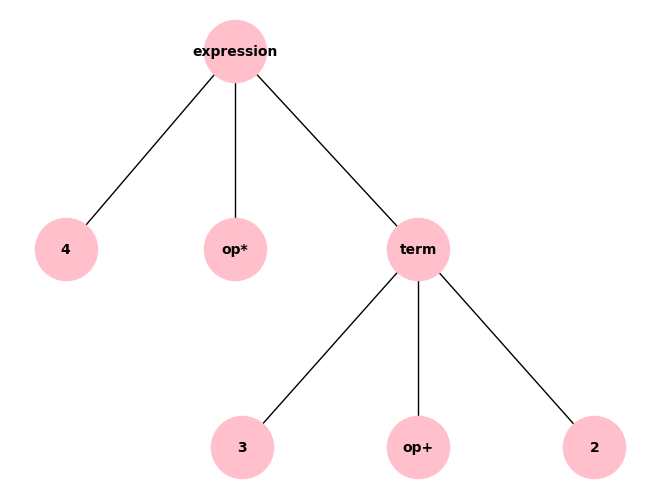

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# Create the directed graph from our parse tree
G = nx.DiGraph()

# Function to add nodes and edges
def add_nodes_and_edges(G, node, adjacency_list):
    if node not in adjacency_list:
        return
    for child in adjacency_list[node]:
        G.add_edge(node, child)
        add_nodes_and_edges(G, child, adjacency_list)

add_nodes_and_edges(G, 'expression', parse_tree)

# Use Graphviz to position the nodes in a hierarchical layout
pos = graphviz_layout(G, prog='dot')

# Draw the tree with a top-down hierarchy
nx.draw(
    G, pos, with_labels=True, arrows=False, 
    node_size=2000, node_color="pink", font_size=10, 
    font_weight="bold"
        )

plt.show()

## Exercises

1. **Parse a New Expression**: Given the expression "4 * (3 + 2)", manually parse it according to the grammar provided. Represent your parsed expression as an adjacency list.
2. **Construct and Visualise**: Using your adjacency list from Exercise 1, modify the Python script to build and visualise the new parse tree.
3. **Extend the Grammar**: Add subtraction and division to our grammar. The updated grammar should allow parsing expressions that include "-", and "/".
4. **Automate Parsing**: (Advanced) Write a simple parser that takes an arithmetic expression as input and outputs the corresponding adjacency list. You may use recursive descent parsing techniques to achieve this.